In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def print_diff(idx, lst):
    srv_arr = np.load(building_srv_path + intersect[idx])
    loc_arr = np.load(building_loc_path + intersect[idx])
    ret = sum((srv_arr - loc_arr).flatten())
    # print(ret)
    return srv_arr, loc_arr

# building_srv_path = '/home/yl826/3DPathLoss/nc_raytracing/res/Bl_building_npy/'
# terrain_srv_path = '/home/yl826/3DPathLoss/nc_raytracing/res/Bl_terrain_npy/'

# building_loc_path = '/home/yl826/3DPathLoss/nc_raytracing/temp_res/Bl_building_npy/'
# terrain_srv_path = '/home/yl826/3DPathLoss/nc_raytracing/temp_res/Bl_terrain_npy/'

# intersect = intersection([f for f in os.listdir(building_srv_path) if os.path.isfile(building_srv_path+f)],
#                          [f for f in os.listdir(building_loc_path) if os.path.isfile(building_loc_path+f)])

# fig, ax = plt.subplots(3, 2)
# for i in range(len(intersect)):
#     srv, loc = print_diff(idx=i, lst=intersect)
#     ax[i, 0].imshow(srv, cmap='gray')
#     ax[i, 0].set_title('srv, max:' + str(np.max(srv)))
#     ax[i, 1].set_title('loc, max:' + str(np.max(loc)))
#     ax[i, 1].imshow(loc, cmap='gray')
#     print(srv[340, 520], loc[340, 520])






In [3]:
# plt.imshow(building_arr1, cmap='gray')
# print(building_arr1[800, 0], building_arr1[1000, 0])

In [4]:
# plt.imshow(terrain_arr0)

In [5]:
# plt.imshow(terrain_arr1)

In [6]:
# print(sum((terrain_arr1 - terrain_arr0).flatten()))

In [7]:
# cm_path = '/home/yl826/Sionna_coverage_maps/coverage_maps_error_catching_26Jun23/300_b15923a9-761f-4bf9-8d0a-704b111527d5.npy'
# plt.imshow(10*np.log10(np.load(cm_path)), cmap='gray')

In [8]:
# b = np.zeros((1000, 1000))
# b.fill(np.nan)
# print(b)

In [9]:
# sparse_path = '/home/yl826/3DPathLoss/nc_raytracing/Sionna_coverage_maps/coverage_sparse/267_445a0be9-cc75-4e41-8bc1-c0087d1819ac.npy'
# sparse_arr = np.load(sparse_path)
# plt.imshow(10*np.log10(sparse_arr), cmap='gray')
# print(sparse_arr[~np.isnan(sparse_arr)])

(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)
(100, 100) (100, 100)


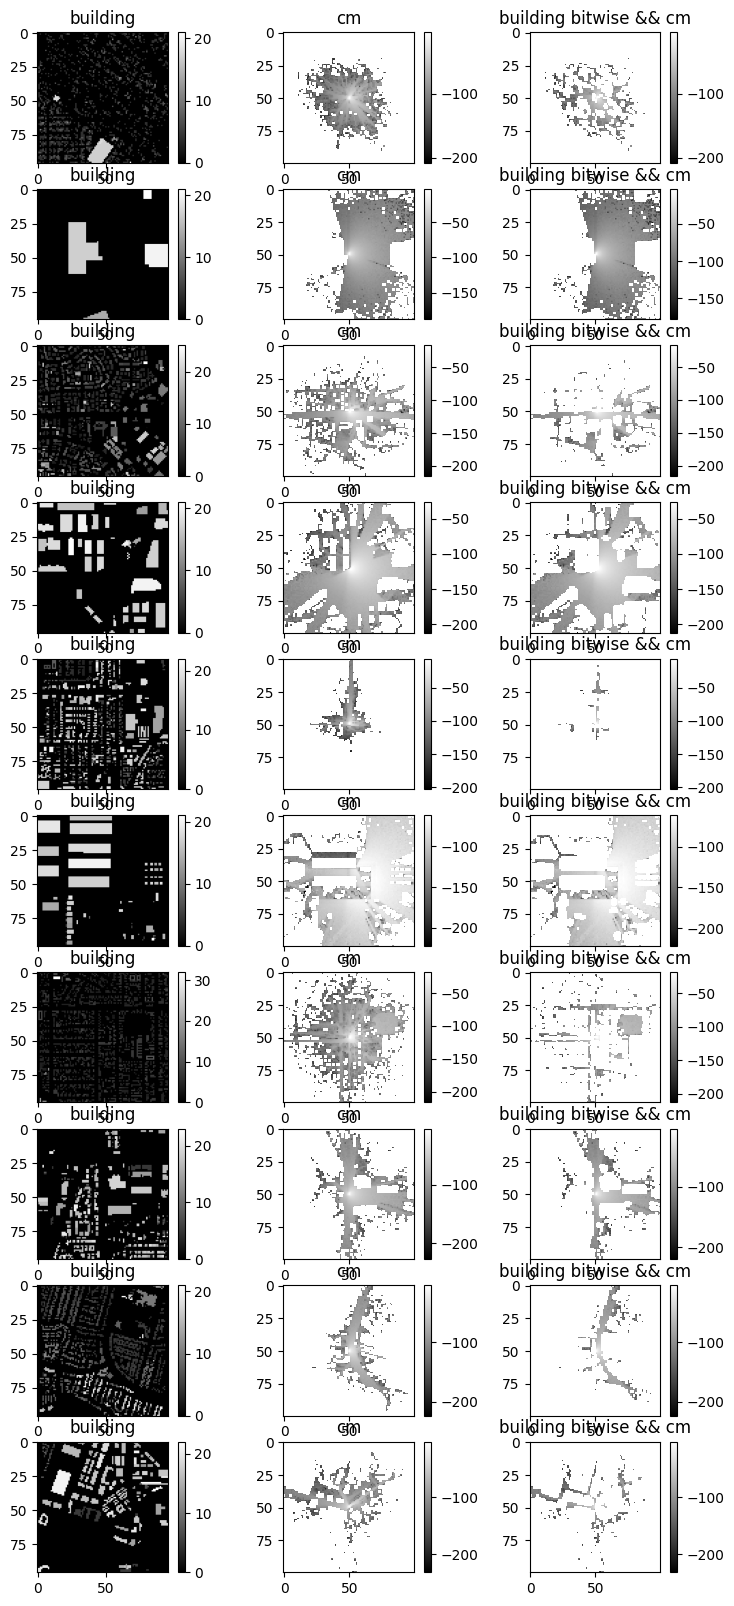

In [49]:
def install_package(package_name):
    try:
        import sys
        import os
        import subprocess
        # path to python.exe
        python_exe = os.path.join(sys.prefix, 'bin', 'python3.8')

        # upgrade pip
        subprocess.call([python_exe, "-m", "ensurepip"])
        subprocess.call([python_exe, "-m", "pip", "install", "--upgrade", "pip"])

        # install required packages
        subprocess.call([python_exe, "-m", "pip", "install", package_name])

        print("DONE")
        return
    except Exception as e:
        raise e
try:
    import cv2
except:
    install_package(package_name='opencv-python')
    import cv2

def squarify_photo(arr, trim=12):
    try:
        arr = np.asarray(arr)
        rrr, ccc = arr.shape
        min_rc = min([rrr, ccc]) - trim
        return arr[int((rrr - min_rc) / 2):int((rrr + min_rc) / 2), int((ccc - min_rc) / 2):int((ccc + min_rc) / 2)]
    except Exception as e:
        raise e


sionna_cm_path = '/dev/shm/coverage_maps_building_map_test_Jul4/'
res_plane_path = '/dev/shm/res_plane/Bl_building_npy/'

intersect = intersection([f for f in os.listdir(res_plane_path) if os.path.isfile(res_plane_path+f)],
                         [f for f in os.listdir(sionna_cm_path) if os.path.isfile(sionna_cm_path+f)])

fig, ax = plt.subplots(10, 3, figsize=(9, 20))

for idx, f_name in enumerate(intersect):
    if idx >= 10: 
        break
    b_arr = squarify_photo(arr=np.load(res_plane_path + f_name))
    interped = cv2.resize(b_arr, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    interped[interped != 0] = 1
    c_arr = (np.load(sionna_cm_path + f_name))
    print(c_arr.shape, interped.shape)
    # p1 = ax[idx, 0].imshow(interped, cmap='gray')
    p1 = ax[idx, 0].imshow(b_arr, cmap='gray')
    ax[idx, 0].set_title('building')
    p2 = ax[idx, 1].imshow(c_arr, cmap='gray')
    ax[idx, 1].set_title('cm')
    plt.colorbar(p1, ax=ax[idx, 0])
    plt.colorbar(p2, ax=ax[idx, 1])
    
    p3 = ax[idx, 2].imshow(np.ma.masked_array(c_arr, mask=interped), cmap='gray')
    ax[idx, 2].set_title('building bitwise && cm')
    plt.colorbar(p3, ax=ax[idx, 2])
plt.savefig('building_cm_comparison.png', dpi=500)